Importing Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Changing Column Type

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

Add Feature to DataFrame

In [32]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x:x ** power)
            
    return poly_dataframe

In [6]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

print(sales.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0      5650      1           0     0     ...          7        1180   
1      7242      2           0     0     ...          7        2170   
2     10000      1           0     0     ...          6         770   
3      5000      1           0     0     ...          7        1050   
4      8080      1           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

In [9]:
sales = sales.sort_values(['sqft_living','price'])

print(sales)

               id             date      price  bedrooms  bathrooms  \
19452  3980300371  20140926T000000   142000.0       0.0       0.00   
15381  2856101479  20140701T000000   276000.0       1.0       0.75   
860    1723049033  20140620T000000   245000.0       1.0       0.75   
18379  1222029077  20141029T000000   265000.0       0.0       0.75   
4868   6896300380  20141002T000000   228000.0       0.0       1.00   
21332  9266700190  20150511T000000   245000.0       1.0       1.00   
8623   6303400395  20150130T000000   325000.0       1.0       0.75   
11500  4322200105  20150331T000000   229050.0       1.0       1.00   
14466  7549801385  20140612T000000   280000.0       1.0       0.75   
465    8658300340  20140523T000000    80000.0       1.0       0.75   
1168   3523029041  20141009T000000   290000.0       2.0       0.75   
18052  1352300580  20141114T000000   247000.0       1.0       1.00   
12075  8655900162  20150219T000000   156000.0       1.0       0.75   
15248  1320069249  2

In [26]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

print(poly1_data.head())

       power_1     price
19452    290.0  142000.0
15381    370.0  276000.0
860      380.0  245000.0
18379    384.0  265000.0
4868     390.0  228000.0


In [12]:
model = LinearRegression()

First Degree Polynomial

In [54]:
model.fit(pd.DataFrame(poly1_data['power_1']),pd.DataFrame(poly1_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

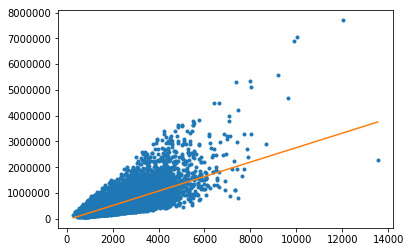

In [25]:
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model.predict(pd.DataFrame(poly1_data['power_1'])),'-')

Second Degree Polynomial

In [33]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

print(poly2_data.head())

       power_1   power_2     price
19452    290.0   84100.0  142000.0
15381    370.0  136900.0  276000.0
860      380.0  144400.0  245000.0
18379    384.0  147456.0  265000.0
4868     390.0  152100.0  228000.0


In [39]:
model.fit(poly2_data.iloc[:,:2],pd.DataFrame(poly2_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

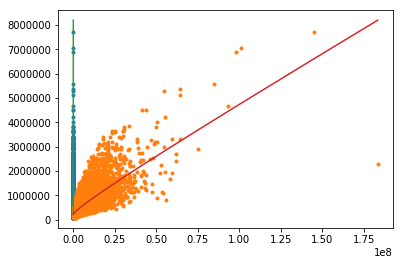

In [40]:
%matplotlib inline
plt.plot(poly2_data.iloc[:,:2],poly2_data['price'],'.',
poly2_data.iloc[:,:2], model.predict(pd.DataFrame(poly2_data.iloc[:,:2])),'-')

Third Degree Polynomial

In [38]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']

print(poly3_data.head())

       power_1   power_2     power_3     price
19452    290.0   84100.0  24389000.0  142000.0
15381    370.0  136900.0  50653000.0  276000.0
860      380.0  144400.0  54872000.0  245000.0
18379    384.0  147456.0  56623104.0  265000.0
4868     390.0  152100.0  59319000.0  228000.0


In [56]:
model.fit(poly3_data.iloc[:,:3],pd.DataFrame(poly3_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

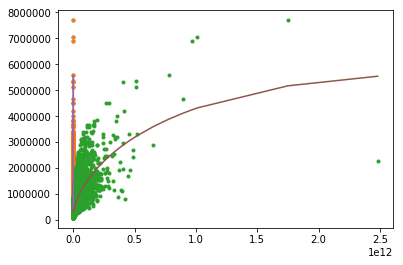

In [44]:
%matplotlib inline
plt.plot(poly3_data.iloc[:,:3],poly3_data['price'],'.',
poly3_data.iloc[:,:3], model.predict(poly3_data.iloc[:,:3]),'-')

Fifteenth Degree Polynomial

In [45]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

print(poly15_data.head())

       power_1   power_2     power_3       power_4       power_5  \
19452    290.0   84100.0  24389000.0  7.072810e+09  2.051115e+12   
15381    370.0  136900.0  50653000.0  1.874161e+10  6.934396e+12   
860      380.0  144400.0  54872000.0  2.085136e+10  7.923517e+12   
18379    384.0  147456.0  56623104.0  2.174327e+10  8.349416e+12   
4868     390.0  152100.0  59319000.0  2.313441e+10  9.022420e+12   

            power_6       power_7       power_8       power_9      power_10  \
19452  5.948233e+14  1.724988e+17  5.002464e+19  1.450715e+22  4.207072e+24   
15381  2.565726e+15  9.493188e+17  3.512479e+20  1.299617e+23  4.808584e+25   
860    3.010936e+15  1.144156e+18  4.347792e+20  1.652161e+23  6.278212e+25   
18379  3.206176e+15  1.231172e+18  4.727699e+20  1.815436e+23  6.971275e+25   
4868   3.518744e+15  1.372310e+18  5.352009e+20  2.087284e+23  8.140406e+25   

           power_11      power_12      power_13      power_14      power_15  \
19452  1.220051e+27  3.538148e+29  1.

In [61]:
model.fit(poly15_data.iloc[:,:15],pd.DataFrame(poly15_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

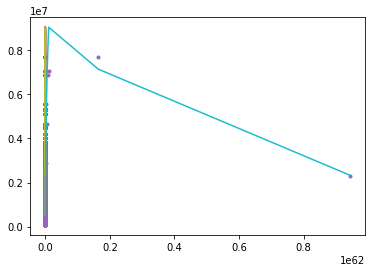

In [62]:
%matplotlib inline
plt.plot(poly15_data.iloc[:,:15],poly15_data['price'],'.',
poly15_data.iloc[:,:15], model.predict(poly15_data.iloc[:,:15]),'-')

In [63]:
model.coef_

array([[ 4.56404164e-91,  6.91713530e-51, -5.84668843e-56,
         0.00000000e+00,  0.00000000e+00,  2.68575170e-71,
         2.26147568e-67,  1.85900299e-63,  1.47144116e-59,
         1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
         1.61618577e-44, -2.49283826e-48,  9.59718336e-53]])

Qn 1

In [79]:
train1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
train2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
train3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
train4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

print(train1.head())
print(train2.head())
print(train3.head())
print(train4.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  8658300340  20140523T000000   80000.0       1.0       0.75        430.0   
1  1352300580  20141114T000000  247000.0       1.0       1.00        460.0   
2  1320069249  20141020T000000  192500.0       1.0       1.00        470.0   
3  1437500015  20140709T000000  150000.0       3.0       0.75        490.0   
4  0859000110  20141002T000000  125000.0       1.0       1.00        500.0   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0      5050      1           0     0     ...          4         430   
1      4120      1           0     0     ...          4         460   
2     63737      1           0     2     ...          5         470   
3     38500    1.5           0     0     ...          5         490   
4      7440      1           0     0     ...          5         500   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1912       

In [80]:
### Model1

train1_data = polynomial_dataframe(train1['sqft_living'], 15)
train1_data['price'] = train1['price']

print(train1_data.head())

   power_1   power_2      power_3       power_4       power_5       power_6  \
0    430.0  184900.0   79507000.0  3.418801e+10  1.470084e+13  6.321363e+15   
1    460.0  211600.0   97336000.0  4.477456e+10  2.059630e+13  9.474297e+15   
2    470.0  220900.0  103823000.0  4.879681e+10  2.293450e+13  1.077922e+16   
3    490.0  240100.0  117649000.0  5.764801e+10  2.824752e+13  1.384129e+16   
4    500.0  250000.0  125000000.0  6.250000e+10  3.125000e+13  1.562500e+16   

        power_7       power_8       power_9      power_10      power_11  \
0  2.718186e+18  1.168820e+21  5.025926e+23  2.161148e+26  9.292937e+28   
1  4.358177e+18  2.004761e+21  9.221902e+23  4.242075e+26  1.951354e+29   
2  5.066231e+18  2.381129e+21  1.119130e+24  5.259913e+26  2.472159e+29   
3  6.782231e+18  3.323293e+21  1.628414e+24  7.979227e+26  3.909821e+29   
4  7.812500e+18  3.906250e+21  1.953125e+24  9.765625e+26  4.882812e+29   

       power_12      power_13      power_14      power_15     price  
0  3

In [82]:
model.fit(train1_data.iloc[:,:15],pd.DataFrame(train1_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

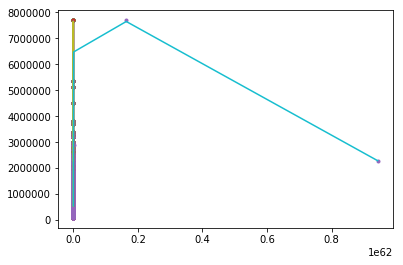

In [83]:
%matplotlib inline
plt.plot(train1_data.iloc[:,:15],train1_data['price'],'.',
train1_data.iloc[:,:15], model.predict(train1_data.iloc[:,:15]),'-')

In [84]:
model.coef_ ### +ve for x^15

array([[ 3.05794168e-90, -1.69394947e-49, -5.61767588e-55,
        -4.97841222e-60,  0.00000000e+00,  1.10358351e-70,
         8.37724029e-67,  6.23411957e-63,  4.49156442e-59,
         3.06938763e-55,  1.91749300e-51,  1.01335180e-47,
         3.62176959e-44, -5.63501661e-48,  2.18641116e-52]])

In [85]:
### Model2

train2_data = polynomial_dataframe(train2['sqft_living'], 15)
train2_data['price'] = train2['price']

print(train2_data.head())

   power_1   power_2     power_3       power_4       power_5       power_6  \
0    390.0  152100.0  59319000.0  2.313441e+10  9.022420e+12  3.518744e+15   
1    410.0  168100.0  68921000.0  2.825761e+10  1.158562e+13  4.750104e+15   
2    420.0  176400.0  74088000.0  3.111696e+10  1.306912e+13  5.489032e+15   
3    420.0  176400.0  74088000.0  3.111696e+10  1.306912e+13  5.489032e+15   
4    440.0  193600.0  85184000.0  3.748096e+10  1.649162e+13  7.256314e+15   

        power_7       power_8       power_9      power_10      power_11  \
0  1.372310e+18  5.352009e+20  2.087284e+23  8.140406e+25  3.174758e+28   
1  1.947543e+18  7.984925e+20  3.273819e+23  1.342266e+26  5.503290e+28   
2  2.305393e+18  9.682652e+20  4.066714e+23  1.708020e+26  7.173683e+28   
3  2.305393e+18  9.682652e+20  4.066714e+23  1.708020e+26  7.173683e+28   
4  3.192778e+18  1.404822e+21  6.181218e+23  2.719736e+26  1.196684e+29   

       power_12      power_13      power_14      power_15     price  
0  1.23815

In [86]:
model.fit(train2_data.iloc[:,:15],pd.DataFrame(train2_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

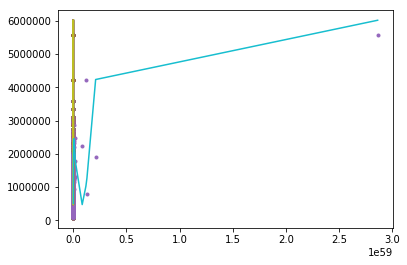

In [87]:
%matplotlib inline
plt.plot(train2_data.iloc[:,:15],train2_data['price'],'.',
train2_data.iloc[:,:15], model.predict(train2_data.iloc[:,:15]),'-')

In [88]:
model.coef_   ### -ve for x^15

array([[ 2.71335949e-77,  7.33541092e-39, -1.85014873e-44,
         8.43742368e-50,  0.00000000e+00,  0.00000000e+00,
         3.64549213e-55,  1.50416258e-51,  5.76015665e-48,
         1.95770497e-44,  5.39396539e-41,  9.40376360e-38,
        -3.63529141e-41,  4.65476524e-45, -1.97197311e-49]])

In [89]:
### Model3

train3_data = polynomial_dataframe(train3['sqft_living'], 15)
train3_data['price'] = train3['price']

print(train3_data.head())

   power_1   power_2      power_3       power_4       power_5       power_6  \
0    390.0  152100.0   59319000.0  2.313441e+10  9.022420e+12  3.518744e+15   
1    480.0  230400.0  110592000.0  5.308416e+10  2.548040e+13  1.223059e+16   
2    480.0  230400.0  110592000.0  5.308416e+10  2.548040e+13  1.223059e+16   
3    520.0  270400.0  140608000.0  7.311616e+10  3.802040e+13  1.977061e+16   
4    520.0  270400.0  140608000.0  7.311616e+10  3.802040e+13  1.977061e+16   

        power_7       power_8       power_9      power_10      power_11  \
0  1.372310e+18  5.352009e+20  2.087284e+23  8.140406e+25  3.174758e+28   
1  5.870683e+18  2.817928e+21  1.352605e+24  6.492506e+26  3.116403e+29   
2  5.870683e+18  2.817928e+21  1.352605e+24  6.492506e+26  3.116403e+29   
3  1.028072e+19  5.345973e+21  2.779906e+24  1.445551e+27  7.516866e+29   
4  1.028072e+19  5.345973e+21  2.779906e+24  1.445551e+27  7.516866e+29   

       power_12      power_13      power_14      power_15     price  
0  1

In [90]:
model.fit(train3_data.iloc[:,:15],pd.DataFrame(train3_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

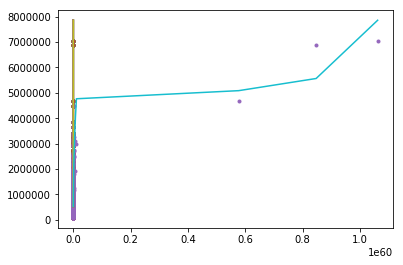

In [91]:
%matplotlib inline
plt.plot(train3_data.iloc[:,:15],train3_data['price'],'.',
train3_data.iloc[:,:15], model.predict(train3_data.iloc[:,:15]),'-')

In [92]:
model.coef_  ### +ve for x^15

array([[ 2.83751934e-88, -7.80224148e-49, -1.38767183e-55,
         3.98272978e-59,  0.00000000e+00,  4.27894986e-69,
         2.68009626e-65,  1.63911362e-61,  9.66435015e-58,
         5.38044653e-54,  2.72563636e-50,  1.16253248e-46,
         3.33756141e-43, -6.76238818e-47,  3.43132932e-51]])

In [93]:
### Model4

train4_data = polynomial_dataframe(train4['sqft_living'], 15)
train4_data['price'] = train4['price']

print(train4_data.head())

   power_1   power_2      power_3       power_4       power_5       power_6  \
0    290.0   84100.0   24389000.0  7.072810e+09  2.051115e+12  5.948233e+14   
1    370.0  136900.0   50653000.0  1.874161e+10  6.934396e+12  2.565726e+15   
2    380.0  144400.0   54872000.0  2.085136e+10  7.923517e+12  3.010936e+15   
3    384.0  147456.0   56623104.0  2.174327e+10  8.349416e+12  3.206176e+15   
4    470.0  220900.0  103823000.0  4.879681e+10  2.293450e+13  1.077922e+16   

        power_7       power_8       power_9      power_10      power_11  \
0  1.724988e+17  5.002464e+19  1.450715e+22  4.207072e+24  1.220051e+27   
1  9.493188e+17  3.512479e+20  1.299617e+23  4.808584e+25  1.779176e+28   
2  1.144156e+18  4.347792e+20  1.652161e+23  6.278212e+25  2.385721e+28   
3  1.231172e+18  4.727699e+20  1.815436e+23  6.971275e+25  2.676970e+28   
4  5.066231e+18  2.381129e+21  1.119130e+24  5.259913e+26  2.472159e+29   

       power_12      power_13      power_14      power_15     price  
0  3

In [94]:
model.fit(train4_data.iloc[:,:15],pd.DataFrame(train4_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

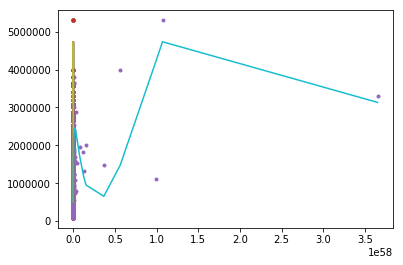

In [95]:
%matplotlib inline
plt.plot(train4_data.iloc[:,:15],train4_data['price'],'.',
train4_data.iloc[:,:15], model.predict(train4_data.iloc[:,:15]),'-')

In [99]:
model.coef_  ### -ve for x^15

array([[ 1.37116050e-76,  2.79678201e-40, -2.13063569e-44,
        -5.68255825e-49,  0.00000000e+00,  0.00000000e+00,
         1.27070051e-54,  4.87868972e-51,  1.73549022e-47,
         5.47058320e-44,  1.39587599e-40,  2.25041871e-37,
        -9.43954119e-41,  1.31573060e-44, -6.09163273e-49]])

Qn 2

In [100]:
### b

Qn 3

In [162]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype = dtype_dict)
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype = dtype_dict)

print(train_data.head())
print(valid_data.head())

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875  20141209T000000   604000.0       4.0       3.00       1960.0   
1  7237550310  20140512T000000  1225000.0       4.0       4.50       5420.0   
2  9212900260  20140527T000000   468000.0       2.0       1.00       1160.0   
3  0114101516  20140528T000000   310000.0       3.0       1.00       1430.0   
4  6054650070  20141007T000000   400000.0       3.0       1.75       1370.0   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0      5000      1           0     0     ...          7        1050   
1    101930      1           0     0     ...         11        3890   
2      6000      1           0     0     ...          7         860   
3     19901    1.5           0     0     ...          7        1430   
4      9680      1           0     0     ...          7        1370   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            910      1965 

In [142]:
rss = []

for degree in range(1,16):
    
    train_data_final = polynomial_dataframe(train_data['sqft_living'], degree)
    train_data_final['price'] = train_data['price']
    valid_data_final = polynomial_dataframe(valid_data['sqft_living'], degree)
    valid_data_final['price'] = valid_data['price']
    
    model = LinearRegression()
    model.fit(pd.DataFrame(train_data_final.iloc[:,:degree]),pd.DataFrame(train_data_final['price']))
    
    predict = model.predict(pd.DataFrame(valid_data_final.iloc[:,:degree]))
    
    rss.append(((valid_data_final['price'] - pd.Series(predict.ravel()))**2).sum())
    
print(rss)

[629097886299585.8, 623955062706518.0, 625820280251531.0, 629987341468500.5, 628240679314420.9, 566268593934056.0, 1073845792802398.6, 7087731525068529.0, 4.530345223846528e+16, 2.475686241299034e+17, 1.193801479215099e+18, 5.08007108579008e+18, 7.616230021251494e+17, 2.2975609250157368e+18, 6.955038097259907e+18]


In [149]:
### Finding degree giving lowest RSS

best_degree = rss.index(min(rss))+1
print(best_degree)

6


Qn 4

In [163]:
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype = dtype_dict)

print(test_data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  3793500160  20150312T000000  323000.0       3.0       2.50       1890.0   
1  1175000570  20150312T000000  530000.0       5.0       2.00       1810.0   
2  0016000397  20141205T000000  189000.0       2.0       1.00       1200.0   
3  0461000390  20140624T000000  687500.0       4.0       1.75       2330.0   
4  7895500070  20150213T000000  240000.0       4.0       1.00       1220.0   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0      6560      2           0     0     ...          7        1890   
1      4850    1.5           0     0     ...          7        1810   
2      9850      1           0     0     ...          7        1200   
3      5000    1.5           0     0     ...          7        1510   
4      8075      1           0     0     ...          7         890   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      2003       

In [166]:
train_data_test = polynomial_dataframe(train_data['sqft_living'], 6)
train_data_test['price'] = train_data['price']

test_data_final = polynomial_dataframe(test_data['sqft_living'], 6)
test_data_final['price'] = test_data['price']

In [165]:
model = LinearRegression()

model.fit(pd.DataFrame(train_data_test.iloc[:,:6]),pd.DataFrame(train_data_test['price']))
    
predict = model.predict(pd.DataFrame(test_data_final.iloc[:,:6]))

test_rss = ((test_data_final['price'] - pd.Series(predict.ravel()))**2).sum()

print(test_rss/10e13)

1.3522511465662297
